<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [52]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.


Load the dataset into a dataframe.


In [53]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<AxesSubplot:xlabel='ConvertedComp'>

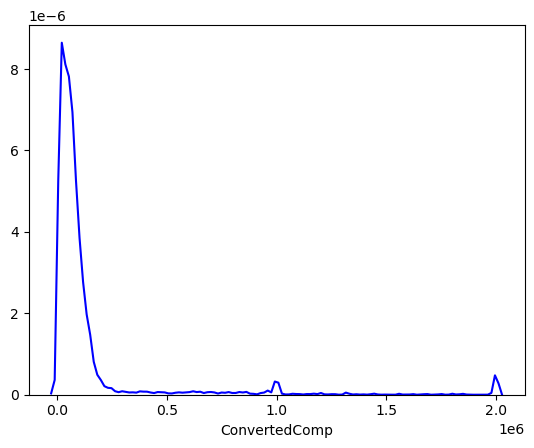

In [96]:
# your code goes here
sns.distplot(df['ConvertedComp'], hist=False, kde=True, 

             bins=int(180/5), color = 'blue')

Plot the histogram for the column `ConvertedComp`.


<AxesSubplot:xlabel='ConvertedComp'>

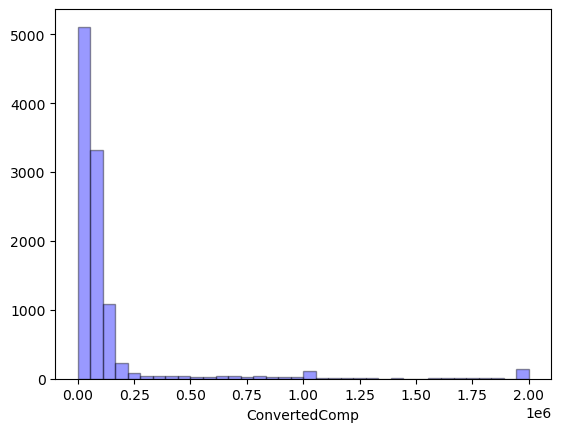

In [94]:
# your code goes here
sns.distplot(df['ConvertedComp'], hist=True, kde=False, 

             bins=int(180/5), color = 'blue',  
             hist_kws={'edgecolor':'black'})


What is the median of the column `ConvertedComp`?


In [64]:
# your code goes here

df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [66]:
# your code goes here
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [83]:
# your code goes here
df.groupby('Gender')['ConvertedComp'].median()


Gender
Man                                                            57744.0
Man;Non-binary, genderqueer, or gender non-conforming          59520.0
Non-binary, genderqueer, or gender non-conforming              67142.0
Woman                                                          57708.0
Woman;Man                                                      21648.0
Woman;Man;Non-binary, genderqueer, or gender non-conforming    30244.0
Woman;Non-binary, genderqueer, or gender non-conforming        65535.5
Name: ConvertedComp, dtype: float64

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [86]:
# your code goes here
df['Age'].describe().loc[['min','25%', '50%','75%','max']]

min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


Text(0.5, 1.0, 'Histogram of Age')

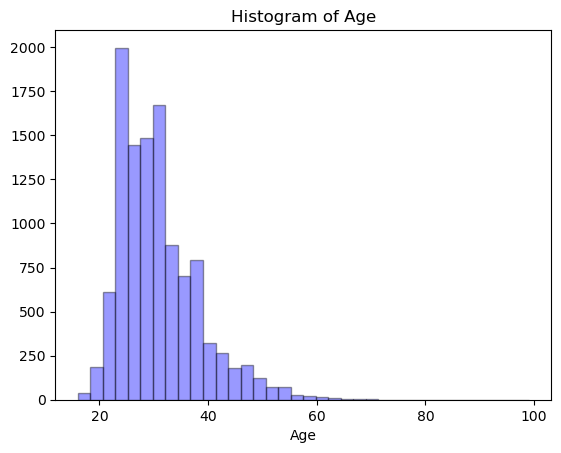

In [95]:
# your code goes here

sns.distplot(df['Age'], hist=True, kde=False, 

             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.title('Histogram of Age')



## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


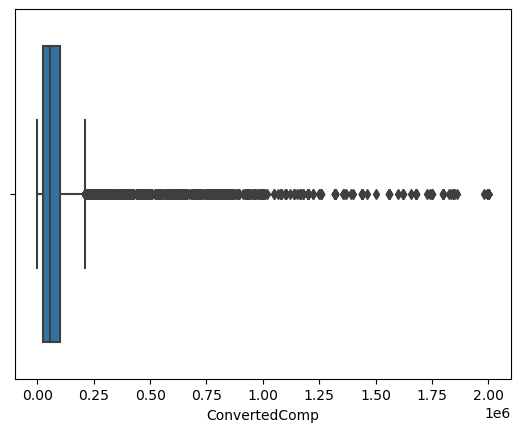

In [97]:
# your code goes here
sns.boxplot(x=df['ConvertedComp'])
plt.show()

In [98]:
# your code goes here
df[['ConvertedComp']].describe()

,ConvertedComp
count,1.058200e+04
mean,1.315967e+05
std,2.947865e+05
min,0.000000e+00
25%,2.686800e+04
50%,5.774500e+04
75%,1.000000e+05
max,2.000000e+06


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [99]:
# Interquartile Range of the data (IQR = Q3 — Q1)
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

IQR= Q3-Q1
IQR


73132.0

Find out the upper and lower bounds.


In [107]:
# lower boundary with this calculation Q1–1.5 * IQR. We will get our upper boundary with this calculation Q3 + 1.5 * IQR.
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

In [108]:

upper_bound 

209698.0

In [109]:

lower_bound

-82830.0

Identify how many outliers are there in the `ConvertedComp` column.


In [110]:
# how many rows
df['ConvertedComp']


0         61000.0
1         95179.0
2         90000.0
3        455352.0
4         65277.0
           ...   
11393    130000.0
11394     19880.0
11395    105000.0
11396     80371.0
11397         NaN
Name: ConvertedComp, Length: 11398, dtype: float64

In [113]:
# how many rows
outliers_15_low = (df['ConvertedComp'] < lower_bound)
outliers_15_up = (df['ConvertedComp'] > upper_bound)

outliers = df['ConvertedComp'][(outliers_15_low | outliers_15_up)]
outliers


3         455352.0
13       1100000.0
45        229016.0
46       2000000.0
60       1000000.0
           ...    
11296     840000.0
11303    1000000.0
11350     300000.0
11353     260000.0
11369     701196.0
Name: ConvertedComp, Length: 879, dtype: float64

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [116]:
# your code goes here
df_new = df['ConvertedComp'][~(outliers_15_low | outliers_15_up)]
df_new

0         61000.0
1         95179.0
2         90000.0
4         65277.0
5         31140.0
           ...   
11393    130000.0
11394     19880.0
11395    105000.0
11396     80371.0
11397         NaN
Name: ConvertedComp, Length: 10519, dtype: float64

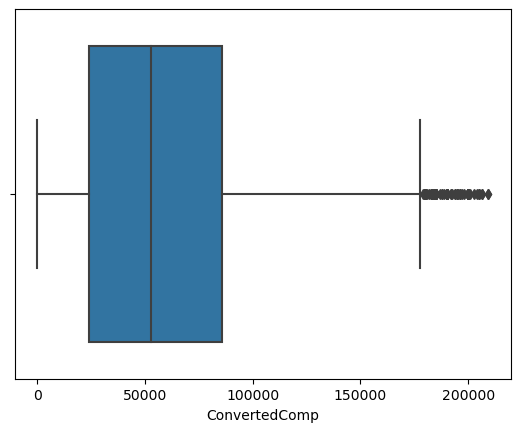

In [119]:
# check the boxplot for outliers
sns.boxplot(x=df_new)
plt.show()

In [120]:
# median
df_new.median()

52704.0

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [122]:
# your code goes here
df.corr()['Age']

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64

In [123]:
# your code goes here
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
